```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [1]:
!pip install diffusers transformers accelerate safetensors

In [2]:
#gpu
from diffusers import StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from PIL import Image

# Diagram

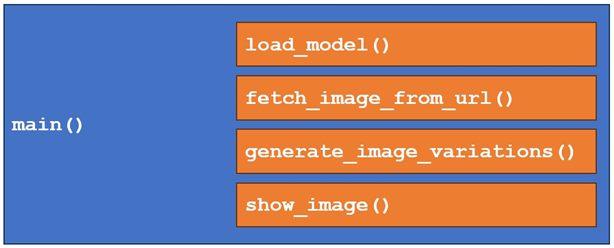

# Code

In [3]:
def load_model(pretrained_model_or_path):
    pipeline = StableDiffusionImageVariationPipeline.from_pretrained(pretrained_model_or_path, revision="v2.0").to("cuda")
    return pipeline

In [4]:
def fetch_image_from_url(url):
    response = requests.get(url)
    image_web = Image.open(BytesIO(response.content)).convert("RGB")
    return image_web

In [5]:
def generate_image_variations(pipeline, image, num_images_per_prompt, num_inference_steps):
    image_results = pipeline(image, num_images_per_prompt=num_images_per_prompt, num_inference_steps=num_inference_steps)
    return image_results["images"]

In [6]:
def show_images(images):
    num_images = len(images)
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Imagem {i+1}')
    plt.show()

In [9]:
def main():
    pretrained_model_or_path = "lambdalabs/sd-image-variations-diffusers"
    url = "https://www.pexels.com/search/sample/"
    num_images_per_prompt = 3
    num_inference_steps = 100

    pipeline = load_model(pretrained_model_or_path)
    image_from_url = fetch_image_from_url(url)
    image_variations = generate_image_variations(pipeline, image_from_url, num_images_per_prompt, num_inference_steps)
    show_images(image_variations)

# Execution

In [ ]:
main()

vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7ea2c508b290>